### All Imports

In [37]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define the Size of the Plots
plt.rcParams['figure.figsize'] = (15,10)

In [38]:
'''
Imports for Plotting American States in Offline Mode
'''
import plotly.plotly as py
import plotly.graph_objs as go #Graphical Object to put value on Map
from plotly.offline import init_notebook_mode,iplot #Gives Interface to View American Map
init_notebook_mode(connected=True)
#Reference URL - https://plot.ly/python/choropleth-maps/#new-to-plotly

### Utility Functions

#### Putting numbers on Box Plot

In [39]:
'''
For Displaying Value on top of the bar plots
'''
def val_on_bar(axs,frmt=' '):
    def _single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height()) + frmt
            ax.text(_x, _y, value , ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single_plot(ax)
    else:
        _single_plot(axs)

#### Plotting On Map - Specific to USA

In [40]:
def plot_loan_on_map(loanbyState):
    '''
    Plot Loan By State
    '''
    scl = [[0.0, 'rgb(242,240,247)'],
           [0.2, 'rgb(218,218,235)'],
           [0.4, 'rgb(188,189,220)'], 
           [0.6, 'rgb(158,154,200)'],
           [0.8, 'rgb(117,107,177)'],
           [1.0, 'rgb(84,39,143)']]

    data = dict(
            type='choropleth',
            colorscale = scl, # Specify the color scale in RGB
            #colorscale = 'Viridis', 
            autocolorscale = True, # Whether to use specified Color Scale or not
            locations = loanbyState['State'],
            z = loanbyState['Total Amount'].astype(float),
            locationmode = 'USA-states',
            text = loanbyState['State'], # Show State Name while hovering over the map
            marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
            colorbar = dict(title = "Million USD"),
            reversescale = False
        )

    layout = dict(
            title = 'Total Loan Amount by US States',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                showframe=False #,
                ##lakecolor = 'rgb(255, 255, 255)'
            ),
        )

    statecolmap = go.Figure(data = [data], layout = layout)
    #Aw, snap! We didn't get a username with your request. Don't have an account? https://plot.ly/api_signup
    #Enable Offline Mode
    iplot(statecolmap, filename = 'd3-cloropleth-map')   

### Load the dataset

In [41]:
'''
Load the Loan.csv
'''
lending_loan = pd.read_csv('loan.csv',low_memory=False)
# DtypeWarning: Columns (47) have mixed types. 
# Specify dtype option on import or set low_memory=False.interactivity=interactivity, compiler=compiler, result=result)

'''
Load the data dictionary
'''
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
print(lending_loan.shape)
lending_loan.head(2)

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning Steps

#### PHASE - 1 : Remove the columns which are not necessary or having lot of null/na values
- Lot Many Columns are with null values - we can drop them straight away and have lot cleaner dataset to work with.
- Drop the ‘desc’ column: Explanation for Loan with date - a separte column for loan date is already present
- Drop the ‘url’ column: Link for the Loan ID - not that useful for analysis.
- Drop the columns with more than 50% missing values - will save time in unnecesary imputation or correction work- No need to fill with mean/mode/median etc as 50% or 60% are having null values - Ideal consideration may be column having 30% null values should be ignored.

In [42]:
''' Step 1 - Drop the column Desc and URL'''
lending_loan.drop(['url','desc'],axis=1,inplace=True) 

''' Step 2 - Drop the columns having 50% or say 60 % Null values'''
lending_loan.dropna(thresh=len(lending_loan) * .6,axis=1,inplace=True)
print(lending_loan.shape) #Check the Shape

(39717, 52)


### Understanding the Data Dictionary  and Dataset by mapping with a single Record
- Create A Dataframe with dtypes of columns of dataframe Lending_loan
- Map any single data with the dtypes - column name and its descrption

In [43]:
'''Check the Data Dictionary'''
print(data_dictionary.shape) #Check the data dictionary data frame
print(data_dictionary.columns.tolist()) #Check the Columns
#To See the complete Description of the Meta Data or complete column description
pd.set_option('max_colwidth', 200)
data_dictionary.head(3)

'''
Create the Dataframe for dtypes
'''
lending_loan_dtypes = pd.DataFrame(lending_loan.dtypes,columns=['dtypes'])
#Reset the Index
lending_loan_dtypes = lending_loan_dtypes.reset_index()
#Rename the Index column as Column_name
lending_loan_dtypes['column_name'] = lending_loan_dtypes['index']
lending_loan_dtypes = lending_loan_dtypes[['column_name','dtypes']]
lending_loan_dtypes.head()

'''
Create A New Column with First Value/Any one value from the Main Dataframe Lending_loan
'''
lending_loan_dtypes['Column value'] = lending_loan.loc[10].values

'''
Merge With Data_Dictionary to have a view of the data mapped with Column Name and Description
'''
data_view = lending_loan_dtypes.merge(data_dictionary, left_on='column_name', right_on='LoanStatNew', how='left')



(117, 2)
['LoanStatNew', 'Description']


In [44]:
data_view

,column_name,dtypes,Column value,LoanStatNew,Description
0,id,int64,1070078,id,A unique LC assigned ID for the loan listing.
1,member_id,int64,1305201,member_id,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,6500,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,int64,6500,funded_amnt,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,6500,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
5,term,object,60 months,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,14.65%,int_rate,Interest Rate on the loan
7,installment,float64,153.45,installment,The monthly payment owed by the borrower if the loan originates.
8,grade,object,C,grade,LC assigned loan grade
9,sub_grade,object,C3,sub_grade,LC assigned loan subgrade


### Data Cleaning : PHASE - 2 : Identify the Columns Which are relevant for analysis and which are not 
### Further Narrowing down the columns
- Randomly generated IDs can be removed - as not required for analysis - such as Id, member_id
- highly correlated columns - can take the average value from both these columns - Grade, Sub Grade
- Redundant Columns 
    - Such as sub_grade(looks like sub-category under Grade)- Not Required seems simillar to grade
    - emp_title - Not useful for analysis
    - zip_code - having xx value(853xx) - Not required for analysis
    - These are not required for analysis as well, because decision is already made and loan is already approved. our Moto is identify whether loan is to be approved or not.
        - funded_amnt 
        - funded_amnt_inv 
        - issue_d
        - out_prncp 
        - out_prncp_inv 
        - total_pymnt 
        - total_pymnt_inv 
        - total_rec_prncp 
        - total_rec_int
        - total_rec_late_fee
        - recoveries
        - collection_recovery_fee
        - last_pymnt_d
        - last_pymnt_amnt  

In [45]:
cols_to_drop = ['id','member_id','sub_grade', 'emp_title','zip_code',
               'funded_amnt','funded_amnt_inv','issue_d','out_prncp','out_prncp_inv',
                'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']

# Drop the columns
lending_loan.drop(cols_to_drop, axis=1,inplace=True)
lending_loan.shape #Now we have 33 columns to analyze

(39717, 33)

### Data Cleaning : PHASE - 3 : Further We can narrow down the columns by excluding the columns having 1 unique Values: Such as
- pymnt_plan, 
- initial_list_status, 
- collections_12_mths_ex_med, 
- policy_code
- application_type,
- acc_now_delinq,
- chargeoff_within_12_mths,
- delinq_amnt,
- tax_liens

#### Such Columns are not good for analysis as not adding any variation to the data - Seems Static Across the data hence can be removed. Further narrow down cane be done for each columns based on its categorical type counts. 

In [46]:
print(lending_loan.columns[lending_loan.nunique()==1])
#ANOTHER APPLROACH - lending_loan.columns[lending_loan.apply(pd.Series.nunique)==1]

# Exclude the columns
lending_loan = lending_loan.loc[:,lending_loan.columns[lending_loan.nunique()!=1]]
lending_loan.head()
#lending_loan['addr_state']

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.0
1,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.0
3,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Current,...,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.0


#### Data Cleaning : PHASE - 4 - Dealing With Null or NA column Values based on there count
 - The Null Values can be imputed with Mean/Mode/Median
 - For this case, emp_length column is having 1075 records(2.7%), title - 11,revol_util-50, last_credit_pull_d-2 and pub_rec_bankruptcies - 697(1.75%).
 - As we have enough data for analysis, we can drop the records having null values.

In [47]:
'''
Check For NUll Count for each columns
'''
null_vals = lending_loan.isnull().sum()
print("No of null values in the columns:\n{}".format(null_vals))
lending_loan = lending_loan.dropna()

'''
Testing after dleteing the null values
''' 
null_vals = lending_loan.isnull().sum().sum()
print("No of null values in the columns:\n{}".format(null_vals))

No of null values in the columns:
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64
No of null values in the columns:
0


### Data Cleaning : PHASE - 5 - Dealing with Special Character or String Appending to Number
    - revol_util and int_rate in % can be convert it to numerical
    - All the Loan Terms are in Months - Remove the String Months from the Term
    - Remove Frequency as only Frequecy is monthly for all the loans


In [48]:
lending_loan['revol_util'] = lending_loan['revol_util'].str.rstrip('%').astype('float')
lending_loan['int_rate'] = lending_loan['int_rate'].str.rstrip('%').astype('float')
lending_loan['Term_value'] = lending_loan['term'].apply(lambda x : int(x.strip()[0:2]))
lending_loan['Frequency'] = lending_loan['term'].apply(lambda x : x.strip()[3:len(x.strip())])

print('Unique Values for Frequency :',lending_loan['Frequency'].unique())

print('Dropping Columns with single value for all the records.')
lending_loan = lending_loan.loc[:,lending_loan.columns[lending_loan.nunique()!=1]]

Unique Values for Frequency : ['months']
Dropping Columns with single value for all the records.


### Outlier Detection and Removal if required
    - The percentage of data seems to be very high for outliers when compared in all the methods. Hence we will keep the data for EDA analysis.
    - Analysis Based On Interest Rate, Loan Amount and Gross Income - Good Loan and Bad Loan distribution is quite inform when compared with 75 and 95 Quantile.

- Analysis of Interest Rate:
    - Good Loan 95 Quantile value: 17.93
    - Bad Loan 95 Quantile value: 20.25
    - Good Loan(Fully paid) Above 75 Quantile Value: 24.9%
    - Good Loan(Fully paid) Above 95 Quantile Value: 4.9%
    - Bad Loan(Charged Off) Above 75 Quantile Value: 24.7%
    - Bad Loan(Charged Off) Above 95 Quantile Value: 4.7%

##### Seems evenly distributed. Hence let's keep all the data and do the EDA. We can exclude them while solving machine learning problem.

In [49]:
print('Total Count',lending_loan['annual_inc'].count())
print('Annual Income under 5 Quantile Count:',lending_loan[lending_loan['annual_inc']<lending_loan['annual_inc'].quantile(.05)]['loan_amnt'].count())
print('Annual Income over 95 Quantile Count:', lending_loan[lending_loan['annual_inc']>lending_loan['annual_inc'].quantile(.95)]['loan_amnt'].count())
print('Loan Amount under 5 Quantile Count:',lending_loan[lending_loan['loan_amnt']<lending_loan['loan_amnt'].quantile(.05)]['loan_amnt'].count())
print('Loan Amount over 95 Quantile Count:',lending_loan[lending_loan['loan_amnt']>lending_loan['loan_amnt'].quantile(.95)]['loan_amnt'].count())
print('Interest rate under 5 Quantile Count:',lending_loan[lending_loan['int_rate']<lending_loan['int_rate'].quantile(.05)]['int_rate'].count())
print('Interest Rate over 95 Quantile Count:',lending_loan[lending_loan['int_rate']>lending_loan['int_rate'].quantile(.95)]['int_rate'].count())

lending_loan['annual_inc'].std() 
#64029.361604734986
lending_loan['annual_inc'].mean()
#69438.45027535407
IQR = lending_loan['annual_inc'].quantile(.75) - lending_loan['annual_inc'].quantile(.25)
ran = 1.5 * IQR #62760.0
print('1.5 IQR: based on Income Amount',ran) # Seems pretty high 

print('\nInterest Rate Analysis:')
print('Good Loan 95 Quantile value:',lending_loan[lending_loan['loan_status']=='Fully Paid']['int_rate'].quantile(.95))
print('Bad Loan 95 Quantile value:',lending_loan[lending_loan['loan_status']=='Charged Off']['int_rate'].quantile(.95))
lending_loan.groupby('loan_status')['int_rate'].describe()

#"Fully Paid": 'Good Loan', "Charged Off": 'Bad Loan'

#Good Loan Based on 75 Quantile Value
x = (lending_loan.loc[(lending_loan.int_rate > 13.99) & (lending_loan.loan_status == 'Fully Paid')].shape[0])/lending_loan['loan_status'].value_counts(normalize=False, dropna=False)[0]
print('Good Loan Above 75 Quantile Value:',x)

#Good Loan Based on 95 Quantile Value
x= (lending_loan.loc[(lending_loan.int_rate > 17.93) & (lending_loan.loan_status == 'Fully Paid')].shape[0])/lending_loan['loan_status'].value_counts(normalize=False, dropna=False)[0]
print('Good Loan Above 95 Quantile Value:',x)


#Bad Loan Based on 75 Quantile Value
x = lending_loan.loc[(lending_loan.int_rate >16.45) & (lending_loan.loan_status == 'Charged Off')].shape[0]/lending_loan['loan_status'].value_counts(normalize=False, dropna=False)[1]
print('Bad Loan Above 75 Quantile Value:',x)

#Bad Loan Based on 95 Quantile Value
x= (lending_loan.loc[(lending_loan.int_rate > 20.25) & (lending_loan.loan_status == 'Charged Off')].shape[0])/lending_loan['loan_status'].value_counts(normalize=False, dropna=False)[1]
print('Bad Loan Above 95 Quantile Value:',x)

Total Count 37887
Annual Income under 5 Quantile Count: 1895
Annual Income over 95 Quantile Count: 1895
Loan Amount under 5 Quantile Count: 1717
Loan Amount over 95 Quantile Count: 1585
Interest rate under 5 Quantile Count: 1673
Interest Rate over 95 Quantile Count: 1893
1.5 IQR: based on Income Amount 62544.0

Interest Rate Analysis:
Good Loan 95 Quantile value: 17.93
Bad Loan 95 Quantile value: 20.25
Good Loan Above 75 Quantile Value: 0.24977002379064234
Good Loan Above 95 Quantile Value: 0.04951625693893735
Bad Loan Above 75 Quantile Value: 0.2473404255319149
Bad Loan Above 95 Quantile Value: 0.047682370820668694


### Deal With Categorical Columns to check if any further column can be excluded from Analysis
    -Approach 
        - Too many categorical values can be excluded
        - Columns : addr_state (Will Keep to Identify State wise Loan distribution)
                    earliest_cr_line, 
                    title, 
                    last_credit_pull_d - can be removed after further analysis

In [50]:
# Check Column data Types to identify categorical columns - lending_loan.select_dtypes
categorical_df = lending_loan.select_dtypes(include=['object'])

for col in categorical_df.columns:
    print(col,':')
    print(categorical_df[col].value_counts(),'\n')
#Too many Categories - Seems irrelevants
#earliest_cr_line - The month the borrower's earliest reported credit line was opened
#addr_state - The state provided by the borrower in the loan application
#title - The loan title provided by the borrower 
#last_credit_pull_d - The most recent month LC pulled credit for this loan - Lending Clud credit pulled date 
#Seems not so relevant for Loan Decision

term :
 36 months    27538
 60 months    10349
Name: term, dtype: int64 

grade :
B    11472
A     9552
C     7730
D     5065
E     2748
F     1009
G      311
Name: grade, dtype: int64 

emp_length :
10+ years    8758
< 1 year     4403
2 years      4299
3 years      4030
4 years      3382
5 years      3242
1 year       3141
6 years      2193
7 years      1747
8 years      1452
9 years      1240
Name: emp_length, dtype: int64 

home_ownership :
RENT        18072
MORTGAGE    16948
OWN          2771
OTHER          96
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       15769
Verified           12342
Source Verified     9776
Name: verification_status, dtype: int64 

loan_status :
Fully Paid     31525
Charged Off     5264
Current         1098
Name: loan_status, dtype: int64 

purpose :
debt_consolidation    17937
credit_card            4899
other                  3713
home_improvement       2828
major_purchase         2089
small_business         1727
car            

In [51]:
add_col_to_drop = ['earliest_cr_line','title','last_credit_pull_d']
lending_loan.drop(add_col_to_drop, axis=1,inplace=True)

## Problem Statement :
    - Identification of key features which can minimize Bad Loans? or Can help business in decision making to minimize the bad loans(Loan Status as Charged Off)
    
#### Assumption if any :
    - Let's take only the samples where the loan_status column is 'Fully Paid' or 'Charged Off' as We’re not interested in the Current on-going loan status as we are not sure whether these will be Fully Paid or Charged Off in future. Hence can ignore the loans having Loan_status as Current.




## Understanding the data and distributions based on various features 

### Univariate and Bivariate Analysis

### 1 - Loan Amount Distribution across american states
    - Analysis of loan count and amount based on States can Useful in identifying good market for loan analysis
    - But it seems not so much important in deciding whether to give loan or not

In [52]:
'''
Create DataFrames to Plot on Map
'''
loanbyState = DataFrame(lending_loan.groupby('addr_state')['loan_amnt'].sum())
loanbyState.reset_index(inplace=True)
loanbyState.columns = ["State", "Total Amount"]
#print(loanbyState.sort_values(by='Total Amount',ascending=False).head())
defaulterloanbyState = DataFrame(lending_loan[lending_loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_amnt'].sum())
defaulterloanbyState.reset_index(inplace=True)
defaulterloanbyState.columns = ["State", "Total Amount"]
defaulterloanbyState.sort_values(by='Total Amount',ascending=False).head()

'''
Plot ALL Loan By State 
'''
plot_loan_on_map(loanbyState)
'''
Plot Defaulter Loan By State 
'''
plot_loan_on_map(defaulterloanbyState)

    - From the above Plot it is clear the best place for loan is CA, NY, TX, FL, NJ
    - If More loan then more defulter - So it does not prove any logical explanation

### 2 - Loan amount and Interest Rate distribution
    - Understandings:
        - 95% of the loan amount is within:  25000.0
        - 95% of the loan interest rate is within:  18.62
    
    So we can consider Any amount and interest rate beyond this as Outlier. But lets not consider them as outlier and do the analysis with all the available data.

\Loan Amount Details ::
Max Loan Amount 35000
Mean Loan Amount 11324.957109298704
95% of the loan amount is within:  25000.0

Interest Rate Details ::
Max interest Rate 24.59
Mode Interest Rate 0    10.99
dtype: float64
95% of the loan interest rate is within:  18.62


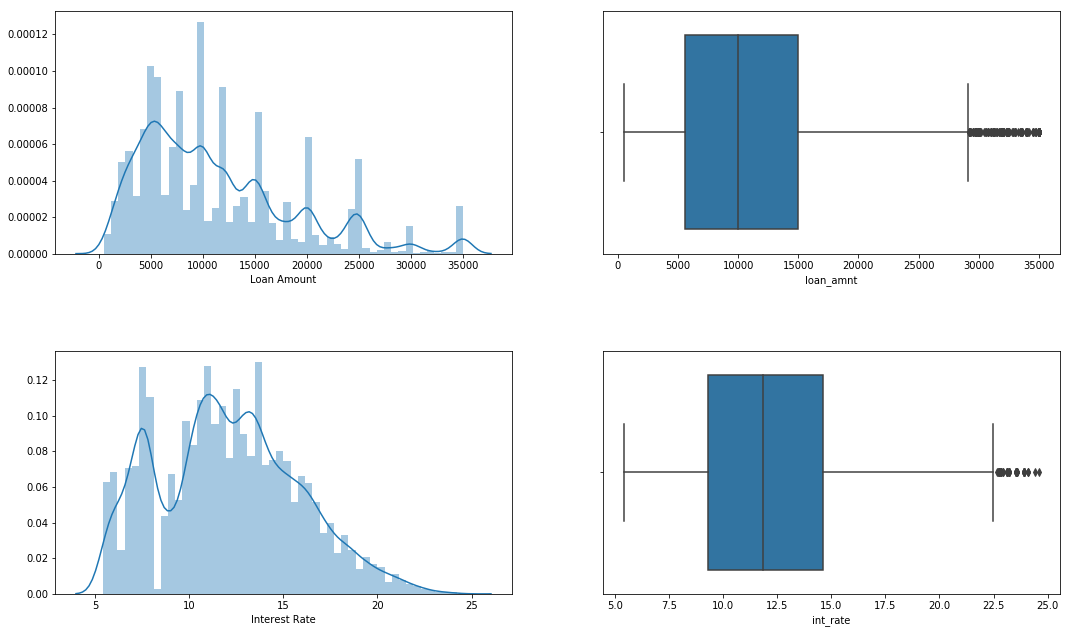

In [53]:
lending_loan['Loan_Amount_range'] = pd.cut(lending_loan['loan_amnt'], 7)
#print(lending_loan.loan_amnt.describe())
print('\Loan Amount Details ::')
print('Max Loan Amount',lending_loan.loan_amnt.max())
print('Mean Loan Amount',lending_loan.loan_amnt.mean())
print('95% of the loan amount is within: ',lending_loan.loan_amnt.quantile(.95)) #95 quantile is 25000

print('\nInterest Rate Details ::')
print('Max interest Rate',lending_loan.int_rate.max())
print('Mode Interest Rate',lending_loan.int_rate.mode())
print('95% of the loan interest rate is within: ',lending_loan.int_rate.quantile(.95))

fig, ax =plt.subplots(2,2, figsize=(18,12))
plt.subplots_adjust(hspace = 0.4, top = .8)

# Loan amount distribution
sns.distplot(lending_loan.loan_amnt,  axlabel="Loan Amount", label="Loan Amount distribution", ax=ax[0][0])
#box plot
sns.boxplot(x=lending_loan.loan_amnt, ax=ax[0][1])
#sns.boxplot??
# Interest rates distribution
sns.distplot(lending_loan.int_rate, axlabel="Interest Rate", label="Interest Rate distribution", ax=ax[1][0])
sns.boxplot(x=lending_loan.int_rate, ax=ax[1][1])

### 3 - Now Let's start the analysis based on Loan Status
    - Target is to identify the defaulters  i.e. current loan status as 'Charged Off'
    - Key Features which can drive the business decision whether to issue loan or not
    - Deafulters are financial loss to the Lending Club or percisely we can classified them as Bad Loan
    - Whereas Fully paid loans can be classified as Good Loan

#### Steps to follow
    - Count of each Loan status
    - As there are only two loan status, we can have a binary classification problem and can replace the status with 1 and 0 or Yes and No or Y and N or Bad Loan and Good Loan. Let's take Good Loan when fully paid and Bad Loan when charged off.
    - Plot a bar plot and Pie plot to check the count and percentage in each category


In [54]:
'''
Count of each Loan Status
'''
lending_loan["loan_status"].value_counts()

Fully Paid     31525
Charged Off     5264
Current         1098
Name: loan_status, dtype: int64

#### Data Visualization

Current         1098
Charged Off     5264
Fully Paid     31525
Name: loan_status, dtype: int64


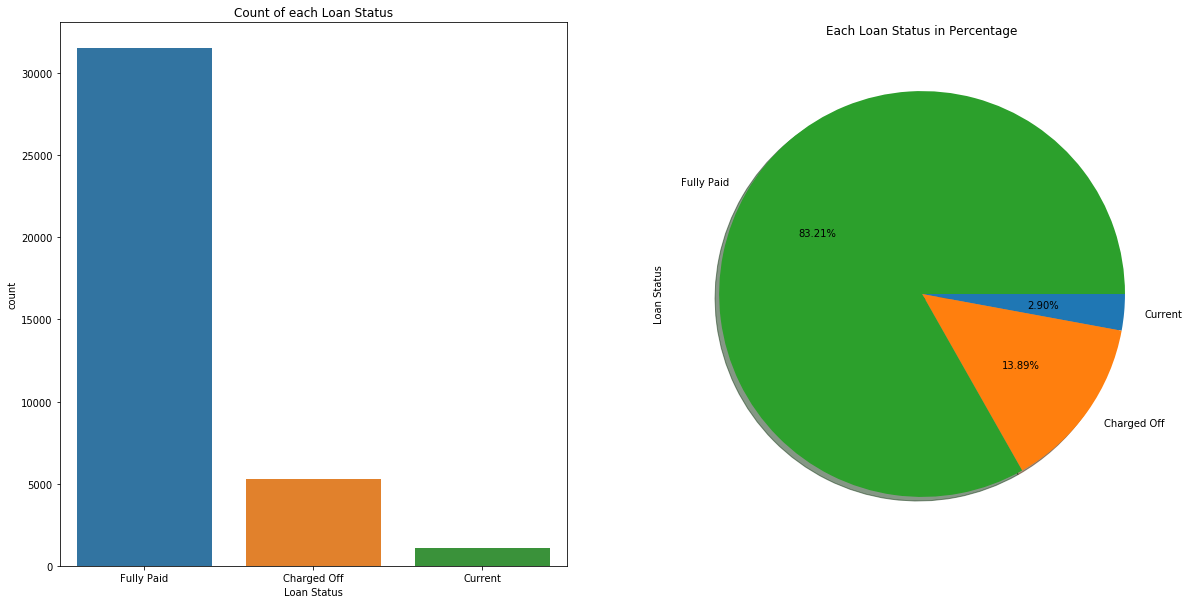

Bad Loan      5264
Good Loan    31525
Name: loan_status, dtype: int64


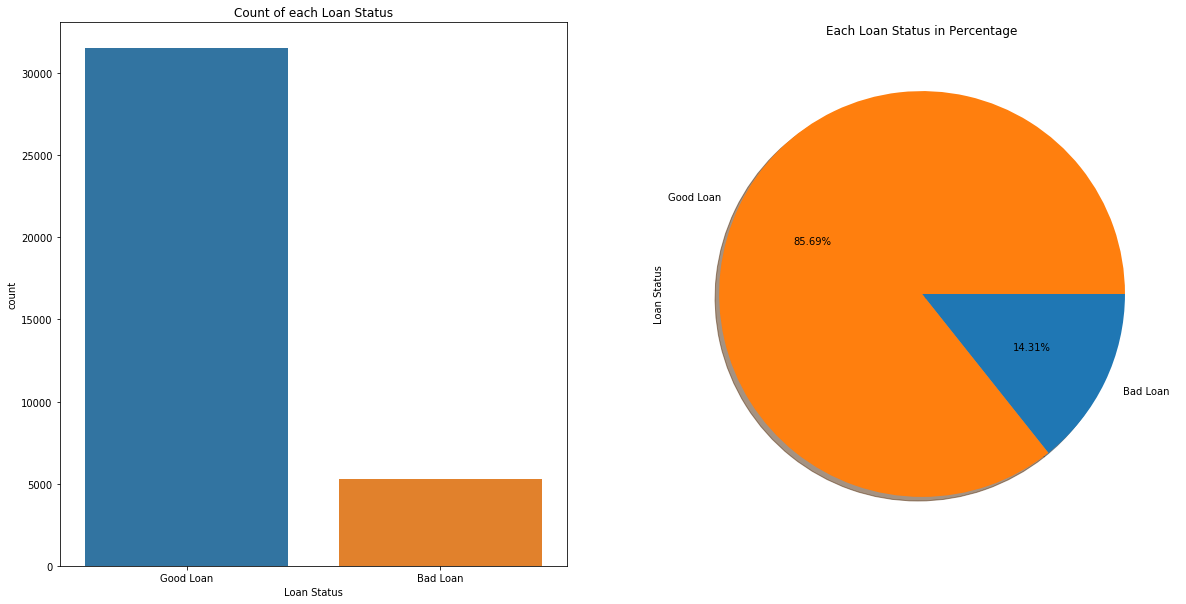

In [55]:
'''
Plot - Before removing current loans
'''
print(lending_loan.loan_status.value_counts().sort_values(ascending=True))
# Plot a Bar Chart to Check the Count Of Each Loan Status
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='loan_status',data=lending_loan,ax=axs[0])
axs[0].set_title("Count of each Loan Status")
axs[0].set_xlabel('Loan Status')

#Plot a Pie chart to Find the Percentages of Loan Fully Paid and Charged Off
lending_loan.loan_status.value_counts().sort_values(ascending=True).plot(
    x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%',shadow=True, counterclock=False)
axs[1].set_title("Each Loan Status in Percentage")
axs[1].set_ylabel('Loan Status')

plt.show()

'''
Plot - After removing current loans
'''

lending_loan = lending_loan[(lending_loan["loan_status"] == "Fully Paid") | (lending_loan["loan_status"] == "Charged Off")]
status_mapping = {"loan_status":{ "Fully Paid": 'Good Loan', "Charged Off": 'Bad Loan'}}
#status_mapping = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
lending_loan = lending_loan.replace(status_mapping)

print(lending_loan.loan_status.value_counts().sort_values(ascending=True))
# Plot a Bar Chart to Check the Count Of Each Loan Status
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='loan_status',data=lending_loan,ax=axs[0])
axs[0].set_title("Count of each Loan Status")
axs[0].set_xlabel('Loan Status')

#Plot a Pie chart to Find the Percentages of Loan Fully Paid and Charged Off
lending_loan.loan_status.value_counts().sort_values(ascending=True).plot(
    x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%',shadow=True, counterclock=False)
axs[1].set_title("Each Loan Status in Percentage")
axs[1].set_ylabel('Loan Status')


plt.show()


### 4 - Good Loan/Bad Loan - Amount and Interest Rate Distributions
- Key Observations:
    - Average Loan Amount for Bad Loans are more than Good Loans
    - As the loan amount and interest rate increases, the bad loans also increase

\Good Loan Amount Details ::
Max Good Loan Amount 35000
Mean Good Loan Amount 10965.614591593972
95% of the good loan amount is within:  25000.0

Good Loan Interest Rate Details ::
Max good loan interest Rate 24.11
Mode good loan Interest Rate 0    10.99
dtype: float64
95% of the good loan interest rate is within:  17.93

Bad Loan Amount Details ::
Max bad Loan Amount 35000
Mean bad Loan Amount 12255.157674772037
95% of the bad loan amount is within:  28000.0

Bad Loan Interest Rate Details ::
Max bad loan interest Rate 24.4
Mode bad loan Interest Rate 0    13.49
dtype: float64
95% of the bad loan interest rate is within:  20.25


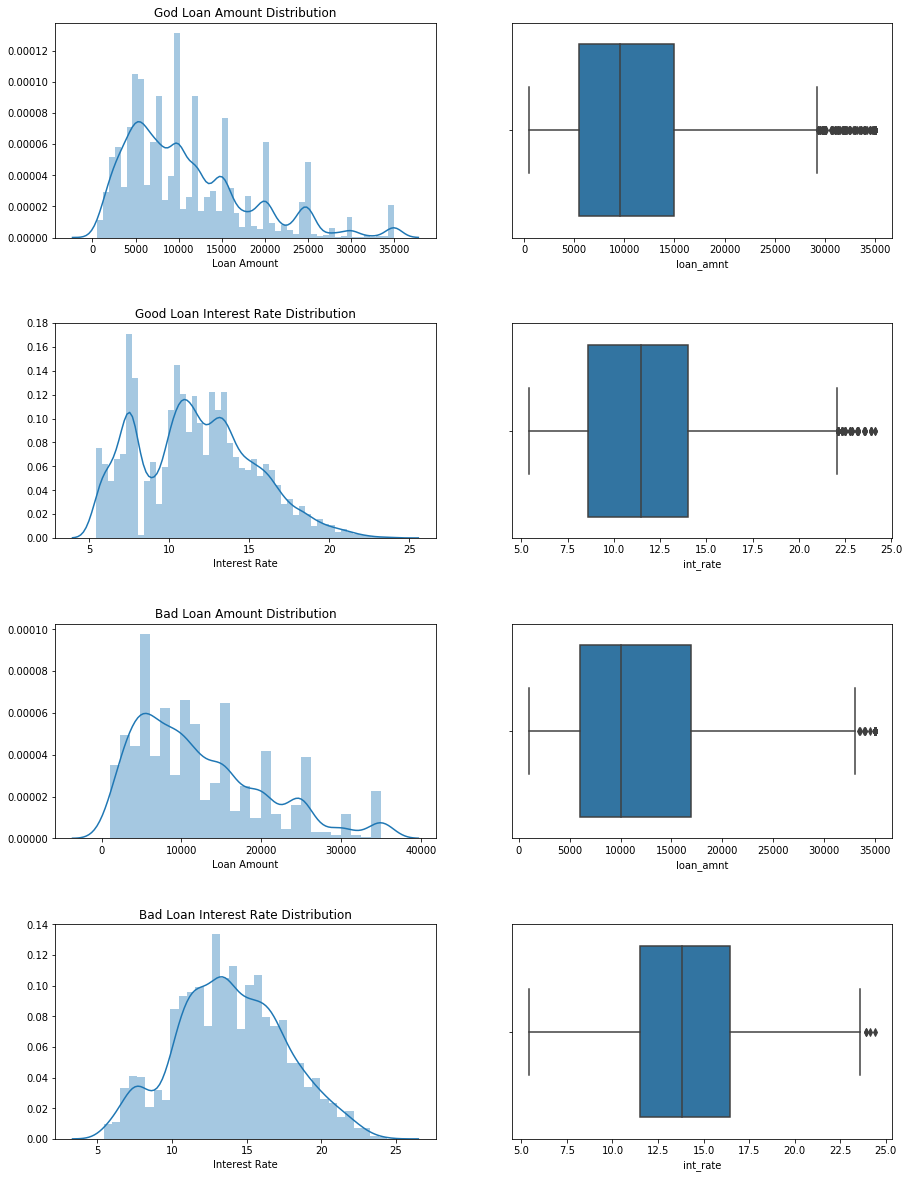

In [56]:
good_loan = lending_loan[lending_loan["loan_status"]=='Good Loan']
bad_loan = lending_loan[lending_loan["loan_status"]=='Bad Loan']

print('\Good Loan Amount Details ::')
print('Max Good Loan Amount',good_loan.loan_amnt.max())
print('Mean Good Loan Amount',good_loan.loan_amnt.mean())
print('95% of the good loan amount is within: ',good_loan.loan_amnt.quantile(.95)) #95 quantile is 25000

print('\nGood Loan Interest Rate Details ::')
print('Max good loan interest Rate',good_loan.int_rate.max())
print('Mode good loan Interest Rate',good_loan.int_rate.mode())
print('95% of the good loan interest rate is within: ',good_loan.int_rate.quantile(.95))

#print('Good Loan Distribution')
#print(good_loan.loan_amnt.describe())
#print(good_loan.loan_amnt.quantile(.95)) #95 quantile is 25000
#print('\n')
#print('Bad Loan Distribution')
#print(bad_loan.loan_amnt.describe())
#print(bad_loan.loan_amnt.quantile(.95))
#print('\n')

fig, ax =plt.subplots(4,2, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = .9)

# Good Loan amount distribution
ax[0][0].set_title('God Loan Amount Distribution')
sns.distplot(good_loan.loan_amnt,  axlabel="Loan Amount", label="Loan Amount distribution", ax=ax[0][0])
sns.boxplot(x=good_loan.loan_amnt, ax=ax[0][1])

# Good Loan Interest rates distribution
ax[1][0].set_title('Good Loan Interest Rate Distribution')
sns.distplot(good_loan.int_rate, axlabel="Interest Rate", label="Interest Rate distribution", ax=ax[1][0])
sns.boxplot(x=good_loan.int_rate, ax=ax[1][1])

print('\nBad Loan Amount Details ::')
print('Max bad Loan Amount',bad_loan.loan_amnt.max())
print('Mean bad Loan Amount',bad_loan.loan_amnt.mean())
print('95% of the bad loan amount is within: ',bad_loan.loan_amnt.quantile(.95)) #95 quantile is 25000

print('\nBad Loan Interest Rate Details ::')
print('Max bad loan interest Rate',bad_loan.int_rate.max())
print('Mode bad loan Interest Rate',bad_loan.int_rate.mode())
print('95% of the bad loan interest rate is within: ',bad_loan.int_rate.quantile(.95))

# Loan amount distribution
ax[2][0].set_title('Bad Loan Amount Distribution')
sns.distplot(bad_loan.loan_amnt,  axlabel="Loan Amount", label="Loan Amount distribution", ax=ax[2][0])
sns.boxplot(x=bad_loan.loan_amnt, ax=ax[2][1])

# Interest rates distribution
ax[3][0].set_title('Bad Loan Interest Rate Distribution')
sns.distplot(bad_loan.int_rate, axlabel="Interest Rate", label="Interest Rate distribution", ax=ax[3][0])
sns.boxplot(x=bad_loan.int_rate, ax=ax[3][1])

#### Conclusions 
    - From  the above we can draw few points:-
        - Good Loan : Maximum Loan(75 quantile) distribution is within amount 15k and 90 quantile within 25k
        - Bad Loan : Maximum Loan(75 quantile) distribution is within amount 17k and 90 quantile within 28K
        - Bad Loan occurs when the average loan amount and interest rate is high than usual values.
        
It does not give any clear distinction between these loan types but as the loan amount and rate increases people tend to default the loan re-payment


### 5 - Effect Of Loan Amount, Interest Rate and DTI on Good Loan and Bad Loan Percentage
- Conclusions :
        - As the loan amount increases, the likelyhood of a person defaulting the loan increases
        - As the interest Rate Increases, the likelyhood of a person defaulting the loan increases
        - 15K above loan amount, the chance of becoming bad loan increases to 17%-25% from 13%.
        - On an average, bad loans ahve higher rate of interest. It has significant impact on a loan being bad loan.


Stats by Amount Range, Interest rate and Status


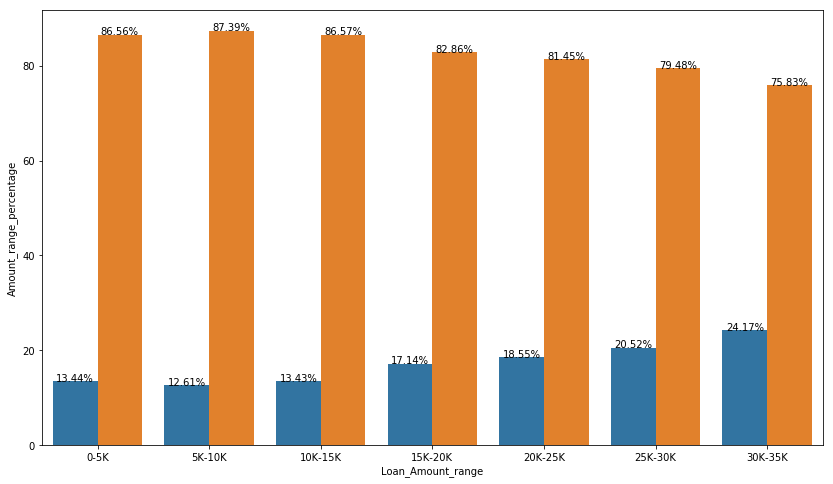

<Figure size 864x576 with 0 Axes>

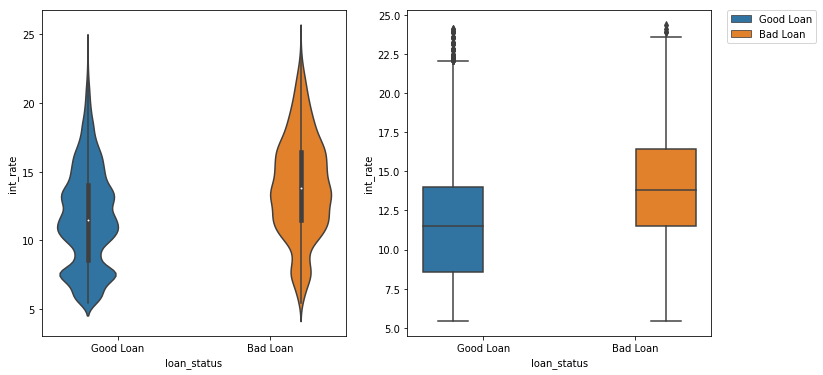

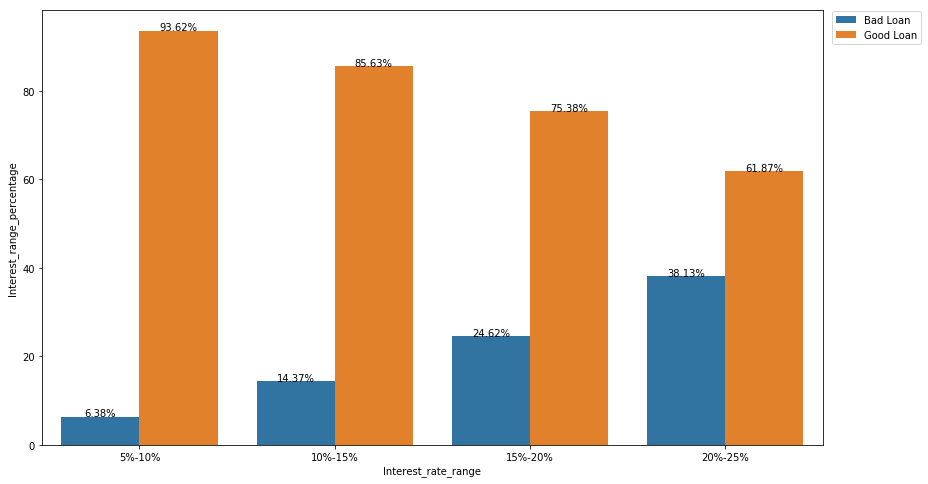

In [57]:
'''
Loan Amount Range Vs Loan Status
'''
bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ["0-5K","5K-10K","10K-15K","15K-20K","20K-25K","25K-30K","30K-35K"]
lending_loan['Loan_Amount_range'] = pd.cut(lending_loan['loan_amnt'],bins=bins, labels=labels)

lending_loan['Loan_Amount_range']
loan_amt_range = lending_loan.groupby(['Loan_Amount_range','loan_status'])['loan_amnt'].count()
loan_amt_range_prct = DataFrame(loan_amt_range.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
loan_amt_range_prct.reset_index(inplace=True)
loan_amt_range_prct['Amount_range_percentage'] = loan_amt_range_prct.loan_amnt
loan_amt_range_prct.drop(['loan_amnt'],axis=1,inplace=True)
print('\nStats by Amount Range, Interest rate and Status')
fig, ax = plt.subplots(1,1, figsize=(14,8),squeeze=False)
plt.figure(figsize=(12,8))
s1 = sns.barplot(x='Loan_Amount_range', y='Amount_range_percentage', hue='loan_status', data=loan_amt_range_prct,ax = ax[0][0])
val_on_bar(ax[0][0],'%')
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)
ax[0][0].get_legend().remove()

'''
People who takes loan with Higher Interest rate are tend to Default the Loan Repayment
'''
lending_loan.int_rate.unique()
fig, ax =plt.subplots(1,2, figsize=(12,6),squeeze=False)
s2 = sns.violinplot(y="int_rate", x= "loan_status",data=lending_loan, hue="loan_status",ax=ax[0][0])
ax[0][0].get_legend().remove()
#plt.legend(loc='best')
s3 = sns.boxplot(y="int_rate",x= "loan_status",data=lending_loan, hue="loan_status",ax=ax[0][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

'''
Plot based on Interest Rate and Percentage of Status
'''
lending_loan['int_rate'].describe()
bins = [5,10,15,20,25]
labels = ["5%-10%","10%-15%","15%-20%","20%-25%"]
pd.cut(lending_loan['int_rate'],bins=bins, labels=labels)
lending_loan['Interest_rate_range'] = pd.cut(lending_loan['int_rate'],bins=bins, labels=labels)
loan_int_range = lending_loan.groupby(['Interest_rate_range','loan_status'])['loan_amnt'].count()

loan_int_range_prct = DataFrame(loan_int_range.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
loan_int_range_prct.reset_index(inplace=True)

loan_int_range_prct['Interest_range_percentage'] = loan_int_range_prct.loan_amnt
loan_int_range_prct.drop(['loan_amnt'],axis=1,inplace=True)

fig, ax = plt.subplots(1,1, figsize=(14,8),squeeze=False)
s4 = sns.barplot(x='Interest_rate_range', y='Interest_range_percentage', hue='loan_status', data=loan_int_range_prct,ax = ax[0][0])
val_on_bar(ax[0][0],'%')
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)


### Impact of DTI on Loans
        - DTI Has Mild effect on Loan Status

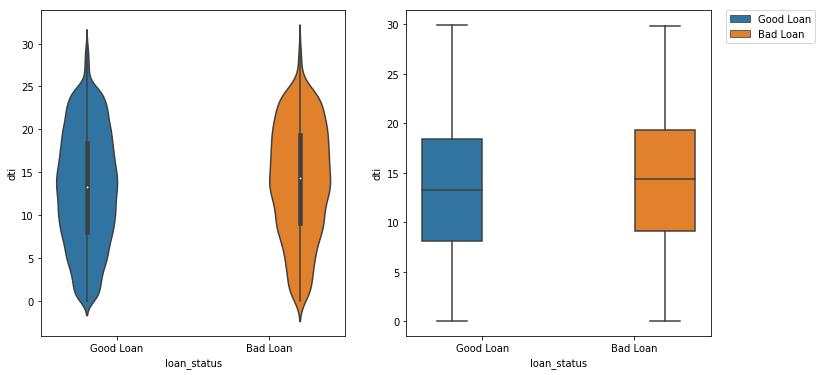

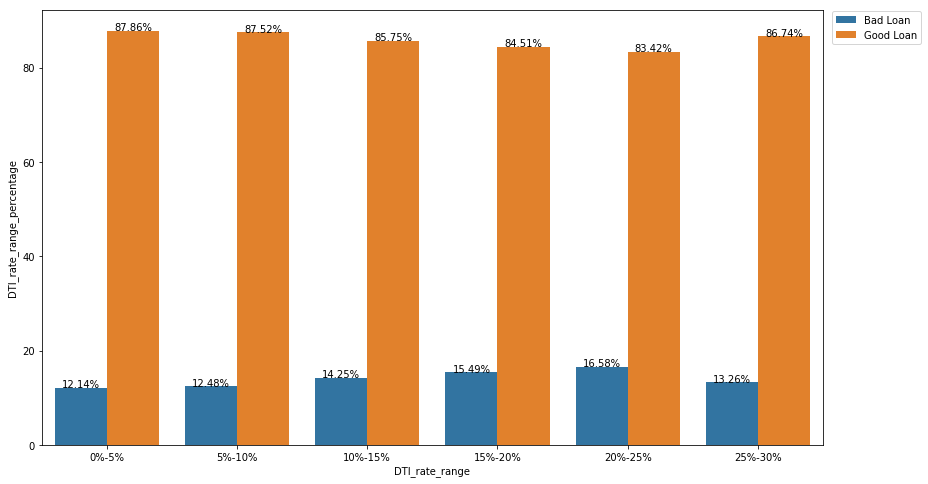

In [58]:
'''
DTI Data Distribution
'''
lending_loan.int_rate.unique()
fig, ax =plt.subplots(1,2, figsize=(12,6),squeeze=False)
s2 = sns.violinplot(y="dti", x= "loan_status",data=lending_loan, hue="loan_status",ax=ax[0][0])
ax[0][0].get_legend().remove()
#plt.legend(loc='best')
s3 = sns.boxplot(y="dti",x= "loan_status",data=lending_loan, hue="loan_status",ax=ax[0][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

'''
Plot based on DTI Rate and Percentage of Status
'''
lending_loan['dti'].describe()
bins = [0,5,10,15,20,25,30]
labels = ["0%-5%","5%-10%","10%-15%","15%-20%","20%-25%","25%-30%"]
#pd.cut(lending_loan['dti'],bins=bins, labels=labels)
lending_loan['DTI_rate_range'] = pd.cut(lending_loan['dti'],bins=bins, labels=labels)
loan_dti_range = lending_loan.groupby(['DTI_rate_range','loan_status'])['loan_amnt'].count()

loan_dti_range_prct = DataFrame(loan_dti_range.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
loan_dti_range_prct.reset_index(inplace=True)

loan_dti_range_prct['DTI_rate_range_percentage'] = loan_dti_range_prct.loan_amnt
loan_dti_range_prct.drop(['loan_amnt'],axis=1,inplace=True)

fig, ax = plt.subplots(1,1, figsize=(14,8),squeeze=False)
s4 = sns.barplot(x='DTI_rate_range', y='DTI_rate_range_percentage', hue='loan_status', data=loan_dti_range_prct,ax = ax[0][0])
val_on_bar(ax[0][0],'%')
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)

### 6 - Good Loan/Bad Loan - Distributions By Grade
#### Bad Loan Percentage Based on Grade
    Conclusion 
        - From the below chart it is evident that the risk of being a bad loan increases based on Loan Grades as the loan grade is dependent on loan amount. Higher Grade means higher loan amount
        - Grade is having a positive co-relation with loan status types

grade loan_status     A     B     C     D     E    F    G
0        Bad Loan   552  1325  1251  1049   685  304   98
1       Good Loan  8965  9820  6222  3800  1888  634  196
grade                A          B          C          D         E          F  \
loan_status                                                                    
Bad Loan      5.800147  11.888739  16.740265  21.633326  26.62262  32.409382   
Good Loan    94.199853  88.111261  83.259735  78.366674  73.37738  67.590618   

grade                G  
loan_status             
Bad Loan     33.333333  
Good Loan    66.666667  

As the Loan Grade increases the percentage of Loan defaulters Increases.


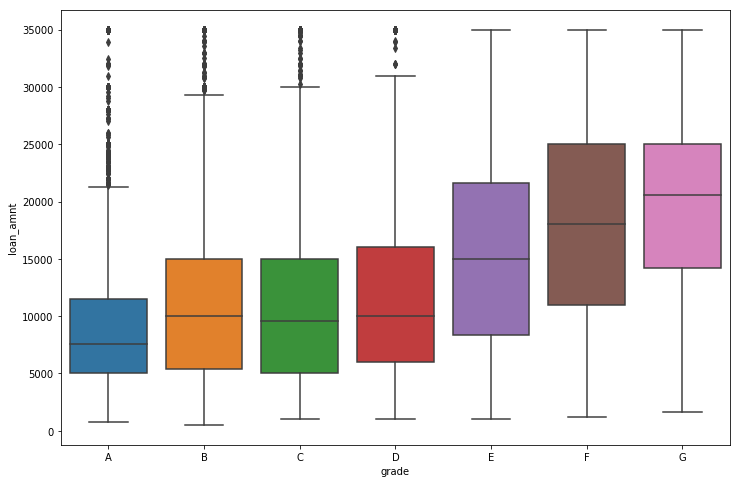

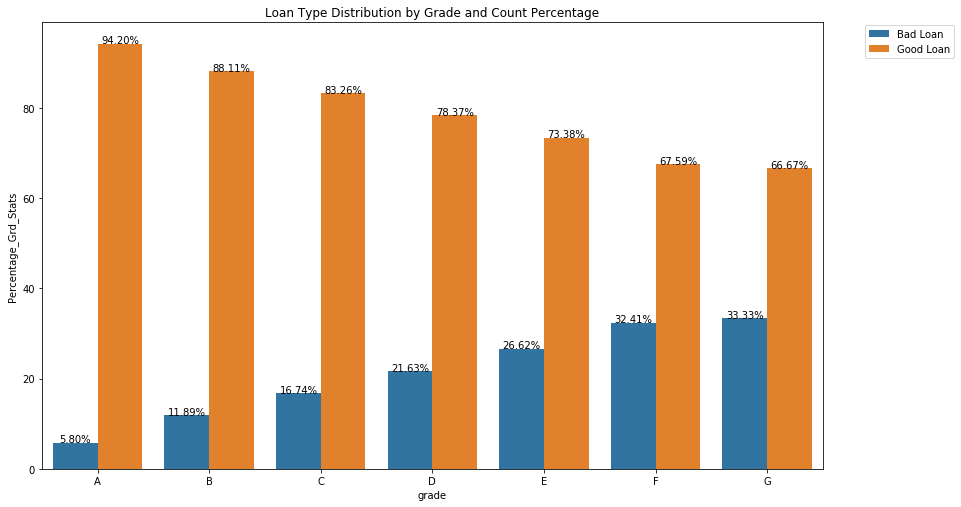

In [59]:
'''
Loan Grade Distributions - Box Plots
'''
plt.figure(figsize=(12,8))
sns.boxplot(x='grade', y='loan_amnt', data=lending_loan, order=list(lending_loan.grade.sort_values().unique()))


ndf = DataFrame(lending_loan.pivot_table(values='loan_amnt',index='loan_status',columns = 'grade',aggfunc = 'count'))
ndf.reset_index(inplace=True)
print(ndf)

'''
Loan Grade Distribution based on Status Percentage - Bar Plots
'''
grd_status = DataFrame(lending_loan.groupby(['grade','loan_status'])['loan_amnt'].count())
grad_stat_prct = DataFrame(grd_status.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
grad_stat_prct.reset_index(inplace=True)
#grd_status['Graded_Loan_Status'] = grd_status['grade'] +' '+ grd_status['loan_status']
grad_stat_prct['Percentage_Grd_Stats'] = grad_stat_prct['loan_amnt']
grad_stat_prct.drop(['loan_amnt'],axis=1,inplace=True)
#print(grad_stat_prct)

print(DataFrame(grad_stat_prct.pivot_table(values='Percentage_Grd_Stats',
                                           index='loan_status',columns = 'grade',aggfunc = 'sum')))

fig, ax =plt.subplots(1,1, figsize=(14,8),squeeze=False)
plt.subplots_adjust(hspace = 0.4, top = .9)
ax[0][0].set_title('Loan Type Distribution by Grade and Count Percentage')
s1 = sns.barplot(x='grade', y='Percentage_Grd_Stats',hue='loan_status', data=grad_stat_prct, ax=ax[0][0])
val_on_bar(ax[0][0],'%')
print('\nAs the Loan Grade increases the percentage of Loan defaulters Increases.')
ax=ax[0][0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)
plt.show()

### 7 - Analysis Based on Loan Term and Status - How Loan term Affects the Loan Status
    - Conclusions : As the Loan Term Increases the percentage of Bad Loan Increases

         term loan_status      Term_Loan_Status  Count_By_Term_status
0   36 months    Bad Loan    36 months Bad Loan                  2942
1   36 months   Good Loan   36 months Good Loan                 24596
2   60 months    Bad Loan    60 months Bad Loan                  2322
3   60 months   Good Loan   60 months Good Loan                  6929

Stats by Term and Status
         term loan_status  Count_By_Term_status      Term_Loan_Status
0   36 months    Bad Loan             10.683419    36 months Bad Loan
1   36 months   Good Loan             89.316581   36 months Good Loan
2   60 months    Bad Loan             25.099989    60 months Bad Loan
3   60 months   Good Loan             74.900011   60 months Good Loan

As the Loan Grade increases the percentage of Loan defaulters Increases.


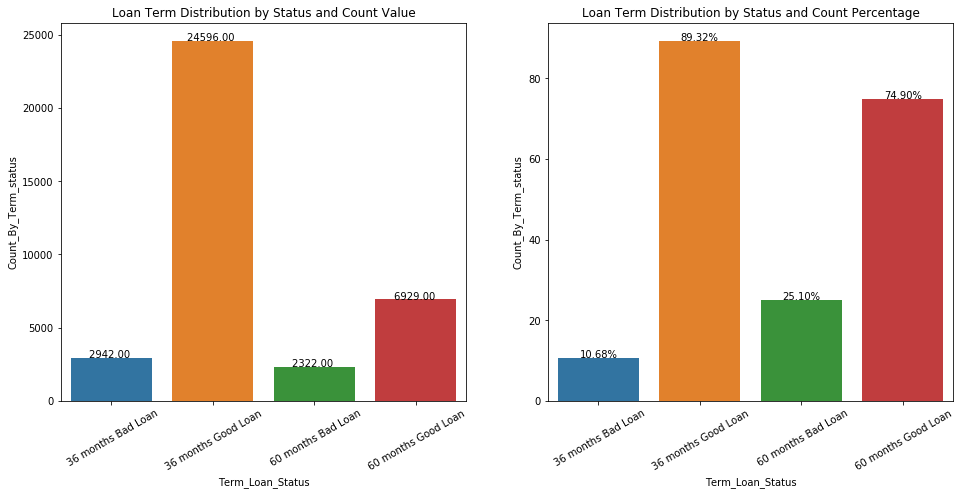

In [60]:
#Count Based on Loan Term
term_df = DataFrame(lending_loan.groupby(['term','loan_status'])['loan_amnt'].count())
term_df.reset_index(inplace=True)
term_df['Term_Loan_Status'] = term_df['term'] +' '+ term_df['loan_status']
term_df['Count_By_Term_status'] = term_df['loan_amnt']
term_df.drop(['loan_amnt'],axis=1,inplace=True)
print(term_df)
#sns.barplot(x='Term_Loan_Status', y='Count_By_Term_status', data=term_df, hue='Term_Loan_Status')
#plt.figure(figsize=(8,4))
fig, ax =plt.subplots(1,2, figsize=(16,6),squeeze=False)
ax[0][0].set_title('Loan Term Distribution by Status and Count Value')
s1 = sns.barplot(x='Term_Loan_Status', y='Count_By_Term_status', data=term_df,ax=ax[0][0])

val_on_bar(ax[0][0])

s1.set_xticklabels(s1.get_xticklabels(),rotation=30)
#plt.show()
#---------------------------------------------------------------------------------------------

plt.subplots_adjust(hspace = 0.5, top = 1) # Space Between Two Plots

#---------------------------------------------------------------------------------------------
term_stat_cnt = term_df.groupby(['term', 'loan_status']).agg({'Count_By_Term_status': 'sum'})
term_stat_cnt_prct = DataFrame(term_stat_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
term_stat_cnt_prct.reset_index(inplace=True)
term_stat_cnt_prct['Term_Loan_Status'] = term_stat_cnt_prct['term'] +' '+ term_stat_cnt_prct['loan_status']

print('\nStats by Term and Status')
print(term_stat_cnt_prct)
ax[0][1].set_title('Loan Term Distribution by Status and Count Percentage')
s2 = sns.barplot(x='Term_Loan_Status', y='Count_By_Term_status', data=term_stat_cnt_prct, ax=ax[0][1])
s2.set_xticklabels(s2.get_xticklabels(),rotation=30)
val_on_bar(ax[0][1],'%')
print('\nAs the Loan Grade increases the percentage of Loan defaulters Increases.')

plt.show()

### 8 - Analysis - Employment Length vs Loan Status 
     Conclusion : Employment Length has Minimal Effect on Loan Status

In [61]:
# Pivot Table
ndf = DataFrame(lending_loan.pivot_table(values='loan_amnt',index='loan_status',columns = 'emp_length',aggfunc = 'count'))
ndf.reset_index(inplace=True)
ndf

emp_length,loan_status,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,Bad Loan,438,1302,555,549,448,452,299,258,199,156,608
1,Good Loan,2632,7065,3647,3398,2840,2702,1833,1427,1209,1052,3720



Loan Status Seems not changing based Employment Length


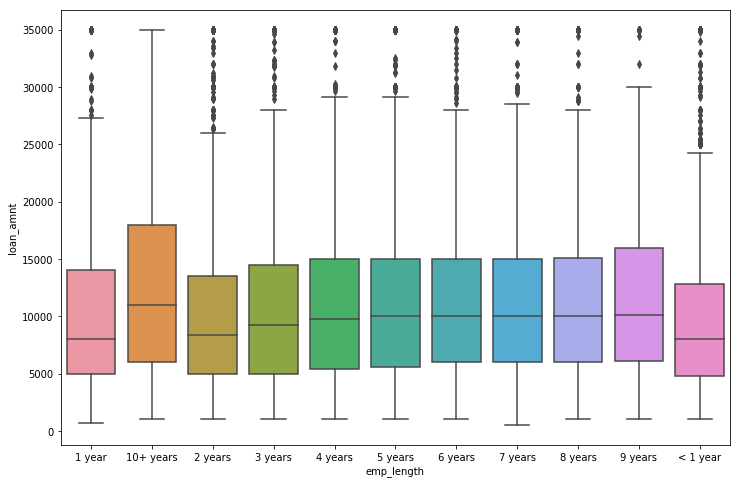

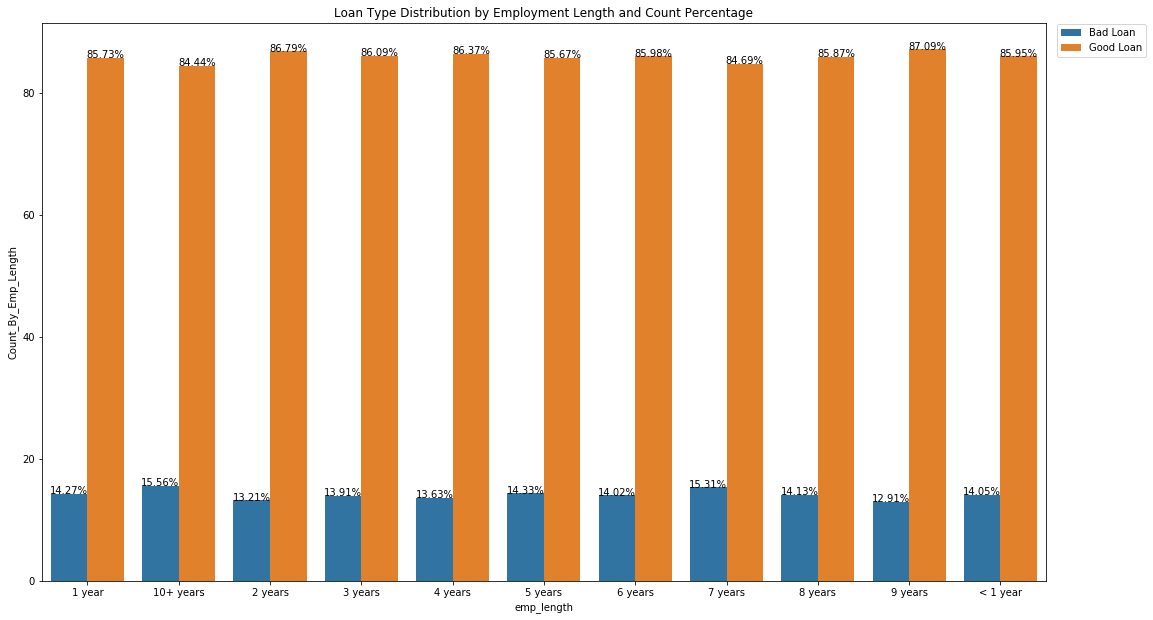

In [62]:
#Count Based on Employement Length
#print(lending_loan.groupby(['emp_length','loan_status'])['loan_amnt'].count())
#Seems Ordinal Data - LC assigned loan grade
emp_length_status = lending_loan.groupby(['emp_length','loan_status'])
#print(emp_length_status['loan_amnt'].count())
plt.figure(figsize=(12,8))
sns.boxplot(x='emp_length', y='loan_amnt', data=lending_loan, order=list(lending_loan.emp_length.sort_values().unique()))

#Again Ordinal value - We can order Loans based on Employment Lenth

'''
Bar Plot Employment Length vs Percentage based on Loan Status
'''
emp_length = DataFrame(lending_loan.groupby(['emp_length','loan_status'])['loan_amnt'].count())
emp_length_prct = DataFrame(emp_length.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
emp_length_prct.reset_index(inplace=True)
#grd_status['Graded_Loan_Status'] = grd_status['grade'] +' '+ grd_status['loan_status']
emp_length_prct['Count_By_Emp_Length'] = emp_length_prct['loan_amnt']
emp_length_prct.drop(['loan_amnt'],axis=1,inplace=True)
#print(emp_length_prct)
fig, ax =plt.subplots(1,1, figsize=(18,10),squeeze=False)
plt.subplots_adjust(hspace = 0.4, top = .9)
ax[0][0].set_title('Loan Type Distribution by Employment Length and Count Percentage')
#plt.figure(figsize=(14,4))
#sns.set(font_scale=2)
s1 = sns.barplot(x='emp_length', y='Count_By_Emp_Length',hue='loan_status', data=emp_length_prct, ax=ax[0][0])
#s1.set_xticklabels(s1.get_xticklabels(),rotation=30)
print('\nLoan Status Seems not changing based Employment Length')
val_on_bar(ax[0][0],'%')

ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)
plt.show()

### 9 - Analysis  - Home Ownership vs Loan Status - % of Bad Loan based on Count
    Conclusion - People with Home Ownership as Other are little more likely to default 


Stats by Home Owership and Status


<Figure size 864x432 with 0 Axes>

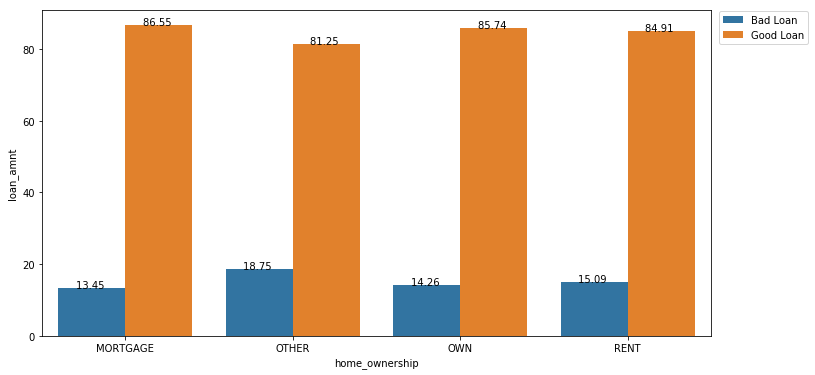

In [63]:
hm_loan = lending_loan.groupby(['home_ownership', 'loan_status']).agg({'loan_amnt': 'count'})
hm_df_cnt_prct = DataFrame(hm_loan.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
hm_df_cnt_prct.reset_index(inplace=True)
#hm_df_cnt_prct['Hm_Own_Loan_Status'] = hm_df_cnt_prct['home_ownership'] +' '+ hm_df_cnt_prct['loan_status']

print('\nStats by Home Owership and Status')
#print(hm_df_cnt_prct)
plt.figure(figsize=(12,6))
fig, ax =plt.subplots(1,1, figsize=(12,6),squeeze=False)
s2 = sns.barplot(x='home_ownership', y='loan_amnt',hue='loan_status', data=hm_df_cnt_prct,ax=ax[0][0])
s2.set_xticklabels(s2.get_xticklabels(),rotation=0)
val_on_bar(ax[0][0])
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)
plt.show()

### 10 - Analysis - Verification Status On Loan Status
    Conclusion - Verification status has mild effect on Loan Status
               - Unverified people are less likely to default


Stats by Term and Status
  verification_status loan_status  loan_amnt            Ver_Loan_Status
0        Not Verified    Bad Loan  12.367355      Not Verified Bad Loan
1        Not Verified   Good Loan  87.632645     Not Verified Good Loan
2     Source Verified    Bad Loan  14.695643   Source Verified Bad Loan
3     Source Verified   Good Loan  85.304357  Source Verified Good Loan
4            Verified    Bad Loan  16.563217          Verified Bad Loan
5            Verified   Good Loan  83.436783         Verified Good Loan


<Figure size 864x576 with 0 Axes>

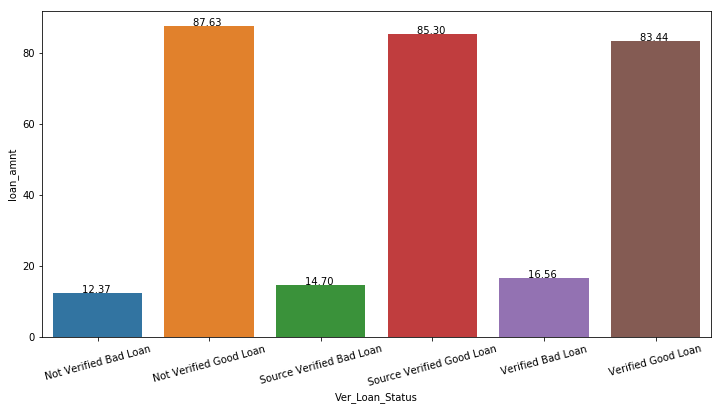

In [64]:
#Count Based on verification_status
ver_loan = lending_loan.groupby(['verification_status', 'loan_status']).agg({'loan_amnt': 'count'})
ver_loan_cnt_prct = DataFrame(ver_loan.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
ver_loan_cnt_prct.reset_index(inplace=True)
ver_loan_cnt_prct['Ver_Loan_Status'] = ver_loan_cnt_prct['verification_status'] +' '+ ver_loan_cnt_prct['loan_status']

print('\nStats by Term and Status')
print(ver_loan_cnt_prct)
plt.figure(figsize=(12,8))
#ax[1][0].set_title('Home Ownership Distribution by Status and Count Percentage')

fig, ax =plt.subplots(1,1, figsize=(12,6),squeeze=False)
s2 = sns.barplot(x='Ver_Loan_Status', y='loan_amnt', data=ver_loan_cnt_prct,ax=ax[0][0])
s2.set_xticklabels(s2.get_xticklabels(),rotation=15)
val_on_bar(ax[0][0])
#ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)

plt.show()

### 11 - Analysis - Loan Purpose Vs Loan Status
- Conclusion : 
    - Loan Purpose Affects the Loan Defaulter Percentages
    - People taking loan for following purposes are more likely to default : Small Business, Renewable Energy, Education, House, Other and medical.

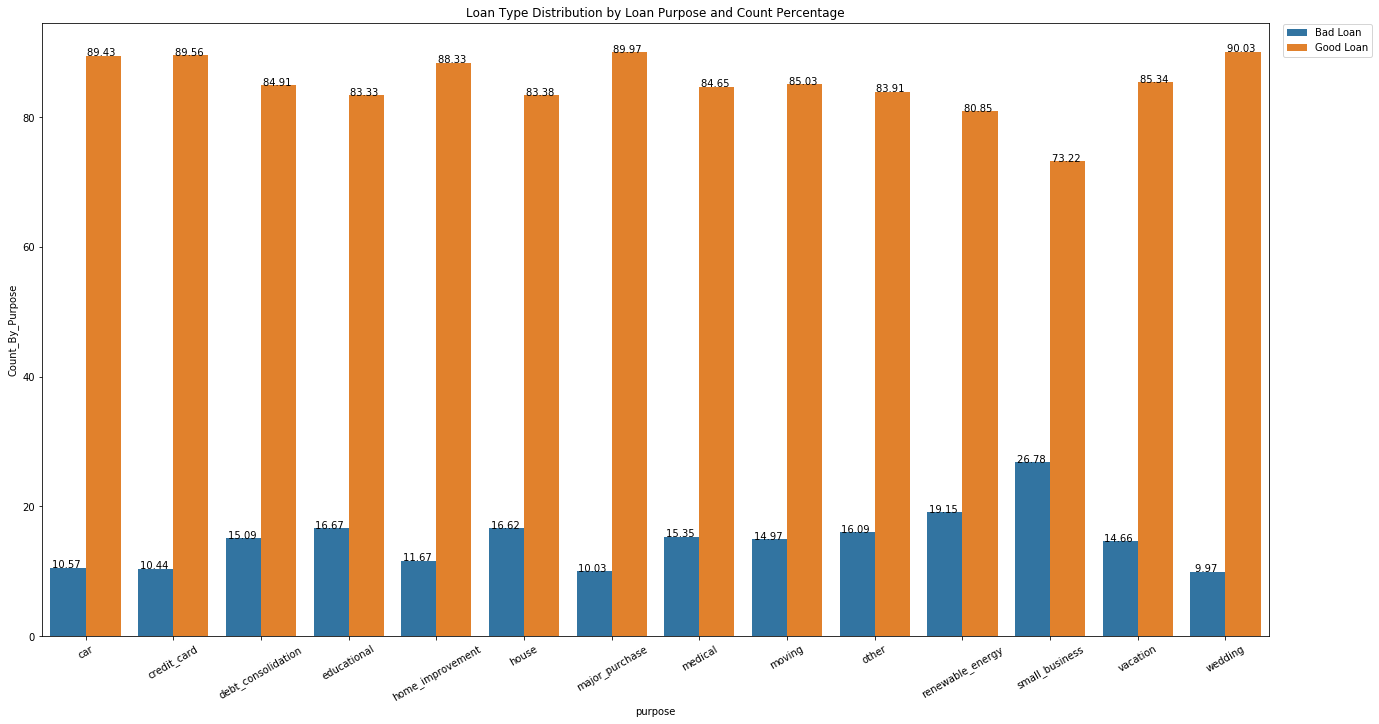

<Figure size 1584x792 with 0 Axes>

In [65]:
purpose = DataFrame(lending_loan.groupby(['purpose','loan_status'])['loan_amnt'].count())
purpose_prct = DataFrame(purpose.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
purpose_prct.reset_index(inplace=True)
#grd_status['Graded_Loan_Status'] = grd_status['grade'] +' '+ grd_status['loan_status']
purpose_prct['Count_By_Purpose'] = purpose_prct['loan_amnt']
purpose_prct.drop(['loan_amnt'],axis=1,inplace=True)
#print(emp_length_prct)
fig, ax =plt.subplots(1,1, figsize=(22,11),squeeze=False)
plt.subplots_adjust(hspace = 0.4, top = .9)
ax[0][0].set_title('Loan Type Distribution by Loan Purpose and Count Percentage')
plt.figure(figsize=(22,11))
s1 = sns.barplot(x='purpose', y='Count_By_Purpose',hue='loan_status', data=purpose_prct, ax=ax[0][0])
s1.set_xticklabels(s1.get_xticklabels(),rotation=30)
val_on_bar(ax[0][0])
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)
plt.show()

### 12 - Analysis of Open Credit Lines Vs Loan Status
- Conclusion : People with more open credit lines are tend to default in loan repayment

In [66]:
lending_loan['open_acc'].describe()

count    36789.000000
mean         9.302754
std          4.375530
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

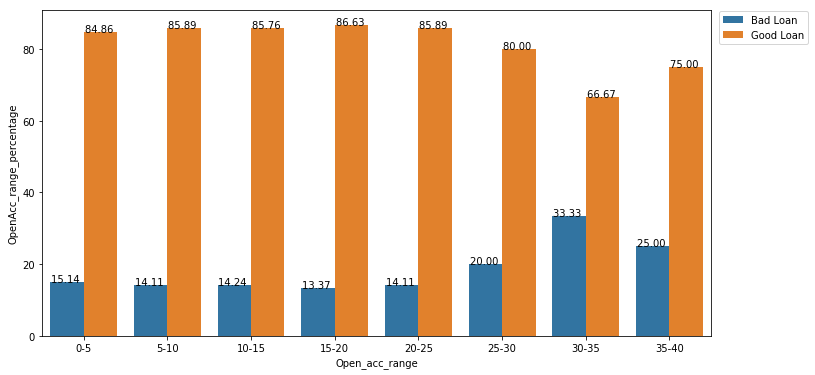

In [67]:
lending_loan.groupby(['loan_status','open_acc']).loan_status.count()
#Find The Open Credit Line for each Loan Account
lending_loan['open_acc'].describe()
bins = [0,5,10,15,20,25,30,35,40]
labels = ["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40"]
lending_loan['Open_acc_range'] = pd.cut(lending_loan['open_acc'],bins=bins, labels=labels)
Open_acc_range = lending_loan.groupby(['Open_acc_range','loan_status'])['loan_amnt'].count()
Open_acc_range_prct = DataFrame(Open_acc_range.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
Open_acc_range_prct.reset_index(inplace=True)

Open_acc_range_prct = Open_acc_range_prct[Open_acc_range_prct.loan_amnt!=100]

Open_acc_range_prct['OpenAcc_range_percentage'] = Open_acc_range_prct.loan_amnt
Open_acc_range_prct.drop(['loan_amnt'],axis=1,inplace=True)

fig, ax =plt.subplots(1,1, figsize=(12,6),squeeze=False)
s4 = sns.barplot(x='Open_acc_range', y='OpenAcc_range_percentage', hue='loan_status', data=Open_acc_range_prct,ax=ax[0][0])
s4.set_xticklabels(s4.get_xticklabels(),rotation=0)
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)
val_on_bar(ax[0][0])



### 12- Analysis of Monthly salary and installment on loan status
- Conclusion :
    - There are definitely outlier in salary data. But higher salary people are less likely to default loan.
    - Excluing the higher salaried people(Salary Higher than 15k), the good and bad loan disctibution seems similar.
    - But when compared the salary amount with installment amount, people having comparatively higher installment amount with respect to salary are more likely to be Charged Off.

In [68]:
#Check salary Less than installemnt if any
lending_loan['monthly_salary']=lending_loan['annual_inc'].apply(lambda x:round(x/12,2))
lending_loan.loc[lending_loan['monthly_salary']<lending_loan['installment']]

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,Term_value,Loan_Amount_range,Interest_rate_range,DTI_rate_range,Open_acc_range,monthly_salary


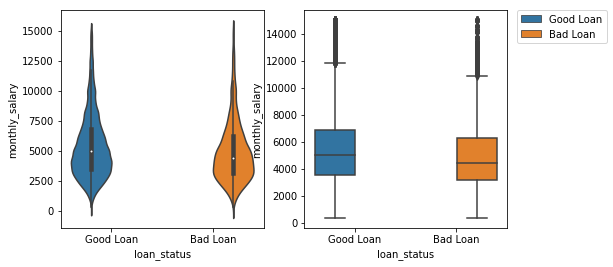

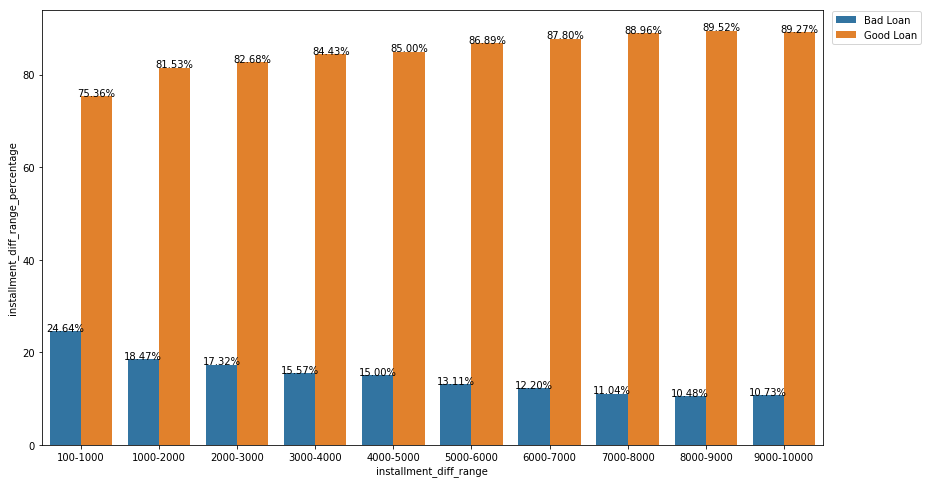

In [69]:
'''
Monthly salary Data Distribution as per loan status
'''
lending_loan.int_rate.unique()
fig, ax =plt.subplots(1,2, figsize=(8,4),squeeze=False)
s2 = sns.violinplot(y="monthly_salary", x= "loan_status",data=lending_loan[lending_loan.monthly_salary<=15000], hue="loan_status",ax=ax[0][0])
ax[0][0].get_legend().remove()
#plt.legend(loc='best')
s3 = sns.boxplot(y="monthly_salary",x= "loan_status",data=lending_loan[lending_loan.monthly_salary<=15000], hue="loan_status",ax=ax[0][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

lending_loan['installment_diff']=lending_loan['monthly_salary']-lending_loan['installment']
lending_loan['installment_diff'].describe()
bins = [100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
labels = ["100-1000","1000-2000","2000-3000","3000-4000","4000-5000","5000-6000","6000-7000","7000-8000","8000-9000","9000-10000"]
pd.cut(lending_loan['installment_diff'],bins=bins, labels=labels)
lending_loan['installment_diff_range'] = pd.cut(lending_loan['installment_diff'],bins=bins, labels=labels)
installment_range = lending_loan.groupby(['installment_diff_range','loan_status'])['loan_amnt'].count()

install_diff_range_prct = DataFrame(installment_range.groupby(level=0).apply(lambda x:100 * x / float(x.sum())))
install_diff_range_prct.reset_index(inplace=True)

install_diff_range_prct['installment_diff_range_percentage'] = install_diff_range_prct.loan_amnt
install_diff_range_prct.drop(['loan_amnt'],axis=1,inplace=True)

fig, ax = plt.subplots(1,1, figsize=(14,8),squeeze=False)
s4 = sns.barplot(x='installment_diff_range', y='installment_diff_range_percentage', hue='loan_status', data=install_diff_range_prct,ax = ax[0][0])
val_on_bar(ax[0][0],'%')
ax[0][0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.1)

### 13 - Correlation Analysis of numerical columns
- Correlation analysis is not that much helpful in this case.
- From the correlation analysis, it is evident that Installment is having strong +ve correlation with loan amount and Bad Loans are somewhat correlated with Interest Rate

In [70]:
#Create A New Column As Bad_loan
df = lending_loan[['loan_amnt','Term_value', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose','Loan_Amount_range','Interest_rate_range','Open_acc_range']]

In [71]:
df['Bad_loan'] = df['loan_status'].apply(lambda s: np.float(s == 'Bad Loan'))
df = df.drop('loan_status',axis = 1)

num_cols = df.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['loan_amnt', 'Term_value', 'int_rate', 'installment', 'annual_inc',
       'Loan_Amount_range', 'Interest_rate_range', 'Open_acc_range',
       'Bad_loan'],
      dtype='object')


C:\Users\ishan gagerna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



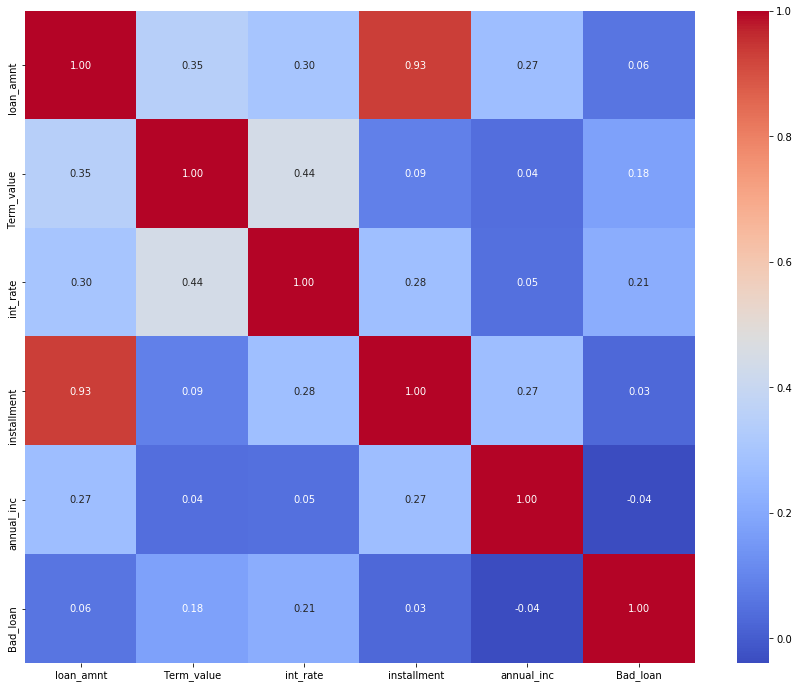

In [72]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df[num_cols].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)